<a href="https://colab.research.google.com/github/jnprogrammer/MachineLearning/blob/master/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# makes the orgininal data
series = np.sin((0.1*np.arange(400))**2)

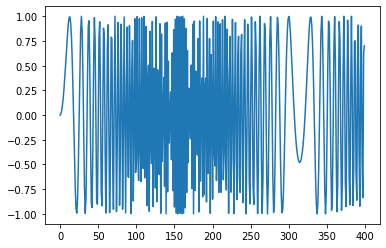

In [7]:
plt.plot(series)
plt.show()

In [11]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # Make it N x T shape
Y = np.array(Y)
N = len(x)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [13]:
# trying the autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)

# train the RNN

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 385 samples, validate on 5 samples
Epoch 1/80
385/385 [==============================] - 0s 765us/sample - loss: 1.4332 - val_loss: 0.0620
Epoch 2/80
385/385 [==============================] - 0s 49us/sample - loss: 1.0796 - val_loss: 0.1205
Epoch 3/80
385/385 [==============================] - 0s 57us/sample - loss: 0.8630 - val_loss: 0.1632
Epoch 4/80
385/385 [==============================] - 0s 47us/sample - loss: 0.7334 - val_loss: 0.2175
Epoch 5/80
385/385 [==============================] - 0s 48us/sample - loss: 0.6398 - val_loss: 0.2645
Epoch 6/80
385/385 [==============================] - 0s 46us/sample - loss: 0.5762 - val_loss: 0.3267
Epoch 7/80
385/385 [==============================] - 0s 49us/sample - loss: 0.5348 - val_loss: 0.3702
Epoch 8/80
385/385 [==============================] - 0s 51us/sample - loss: 0.5134 - val_loss: 0.4011
Epoch 9/80
385/385 [==============================] - 0s 51us/sample - loss: 0.5056 - val_loss: 0.4251
Epoch 10/80
385/385 [=======

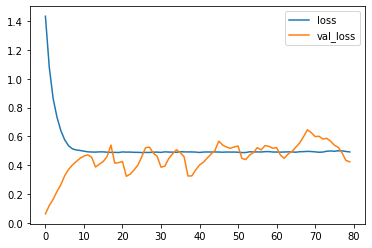

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


(390, 1)


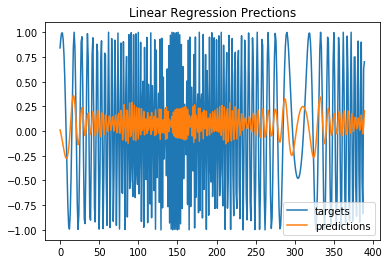

In [15]:
# one-step forecasting using true targets
# note: even the one-step forecast fails badly

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Prections")
plt.legend()
plt.show()

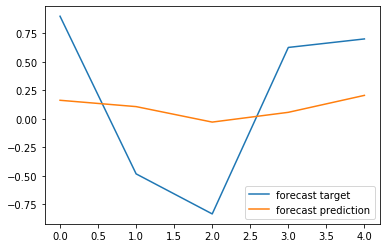

In [16]:
#This is the code from before - it does the same thing
#One-step forcast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


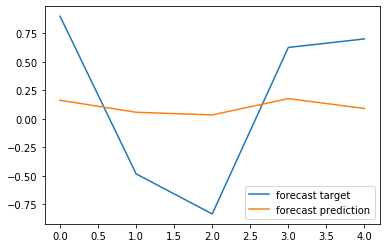

In [19]:
#multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] #1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array -> scalar

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()

In [27]:
# Now a RNN/LSTM model
X = X.reshape(-1, T, 1) #this is to make N * T * D

#make the RNN

i = Input(shape=(T,D))
x = LSTM(10)(i) #swap out SimpleRNN for LSTM
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)


Train on 385 samples, validate on 5 samples
Epoch 1/200
385/385 [==============================] - 1s 3ms/sample - loss: 0.5033 - val_loss: 0.5424
Epoch 2/200
385/385 [==============================] - 0s 242us/sample - loss: 0.4622 - val_loss: 0.4101
Epoch 3/200
385/385 [==============================] - 0s 236us/sample - loss: 0.3753 - val_loss: 0.3938
Epoch 4/200
385/385 [==============================] - 0s 237us/sample - loss: 0.2418 - val_loss: 0.5585
Epoch 5/200
385/385 [==============================] - 0s 243us/sample - loss: 0.1243 - val_loss: 0.3520
Epoch 6/200
385/385 [==============================] - 0s 229us/sample - loss: 0.0785 - val_loss: 0.1111
Epoch 7/200
385/385 [==============================] - 0s 224us/sample - loss: 0.0418 - val_loss: 0.0506
Epoch 8/200
385/385 [==============================] - 0s 236us/sample - loss: 0.0312 - val_loss: 0.0057
Epoch 9/200
385/385 [==============================] - 0s 242us/sample - loss: 0.0246 - val_loss: 0.0198
Epoch 10/200


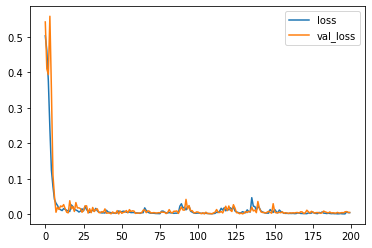

In [28]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


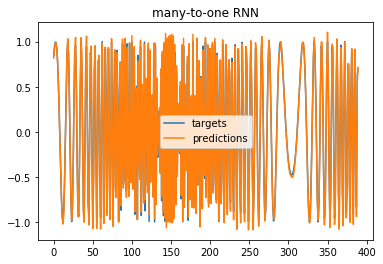

In [29]:
#one-step forecast using true targets

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

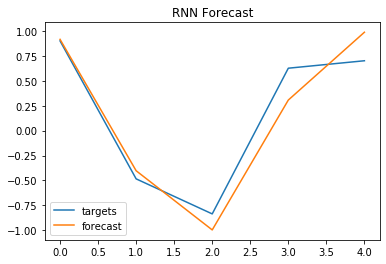

In [30]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  #reshape the input to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  #make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()